# 1. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import os
import matplotlib.pyplot as plt
import folium
import json
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans
import pylab as pl

In [2]:
#Creating path string
path = r'C:\Users\Alex Lam\Desktop\Career Foundary\Citi Bike Analysis'

In [5]:
#Importing datasets
df_citi_bike = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'citi bike prepared 2.csv'))

# 2. Cleaning dataframe for k-means

In [6]:
df_citi_bike.head()

,day_of_week,start_hour,start_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_time,end_station_id,end_station_name,...,trip_duration,subscriber,birth_year,gender,end_date,end_hour,trip_duration_min,Age Group,Trip Duration Group,Day of the Week Label
0,Mon,18,9/9/2013 18:18,523,W 38 St & 8 Ave,40.754666,-73.991382,9/9/2013 18:35,334,W 20 St & 7 Ave,...,993,Subscriber,1968.0,F,9/9/2013,18,16.550000,Middle Aged,Medium,1
1,Thu,18,9/12/2013 18:38,257,Lispenard St & Broadway,40.719392,-74.002472,9/12/2013 18:48,236,St Marks Pl & 2 Ave,...,581,Subscriber,1983.0,M,9/12/2013,18,9.683333,Young,Short,4
2,Wed,19,9/18/2013 19:44,479,9 Ave & W 45 St,40.760193,-73.991255,9/18/2013 19:50,513,W 56 St & 10 Ave,...,361,Subscriber,1989.0,M,9/18/2013,19,6.016667,Young,Short,3
3,Sat,11,9/28/2013 11:54,527,E 33 St & 1 Ave,40.743156,-73.974347,9/28/2013 12:03,441,E 52 St & 2 Ave,...,561,Subscriber,1988.0,F,9/28/2013,12,9.350000,Young,Short,6
4,Sat,18,9/7/2013 18:08,521,8 Ave & W 31 St,40.750450,-73.994811,9/7/2013 18:46,476,E 31 St & 3 Ave,...,2296,Non-Subscriber,NaN,NaN,9/7/2013,18,38.266667,Middle Aged,Long,6


In [7]:
df_citi_bike.columns

Index(['day_of_week', 'start_hour', 'start_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_time', 'end_station_id',
       'end_station_name', 'end_station_latitude', 'end_station_longitude',
       'trip_duration', 'subscriber', 'birth_year', 'gender', 'end_date',
       'end_hour', 'trip_duration_min', 'Age Group', 'Trip Duration Group',
       'Day of the Week Label'],
      dtype='object')

In [9]:
#Creating dataframe with only numerical variables I need
df_citi_bike_kmeans = df_citi_bike.drop(columns = ['day_of_week', 'start_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_time', 'end_station_id',
       'end_station_name', 'end_station_latitude', 'end_station_longitude',
       'trip_duration', 'subscriber', 'gender', 'end_date',
       'end_hour', 'Age Group', 'Trip Duration Group',
       'Day of the Week Label'])

In [10]:
#Checking output of new dataframe
df_citi_bike_kmeans.head()

,start_hour,birth_year,trip_duration_min
0,18,1968.0,16.550000
1,18,1983.0,9.683333
2,19,1989.0,6.016667
3,11,1988.0,9.350000
4,18,NaN,38.266667


In [14]:
#Dropping all NA values
df_citi_bike_kmeans.dropna(inplace = True)

In [15]:
df_citi_bike_kmeans.isnull().sum()

start_hour           0
birth_year           0
trip_duration_min    0
dtype: int64

# 4. Elbow Technique

In [11]:
num_cl = range(1, 8)
kmeans = [KMeans(n_clusters = i) for i in num_cl]

In [16]:
score = [kmeans[i].fit(df_citi_bike_kmeans).score(df_citi_bike_kmeans) for i in range(len(kmeans))]

C:\Users\Alex Lam\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Alex Lam\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Alex Lam\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Alex Lam\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Alex Lam\anaconda3\Lib\site-package

In [17]:
score

[-9611177.434983414,
 -5933962.5434391415,
 -4237489.911082674,
 -3537383.437582168,
 -3097150.2742040367,
 -2747301.7119654855,
 -2464252.574885088]

Text(0.5, 1.0, 'Elbow Curve')

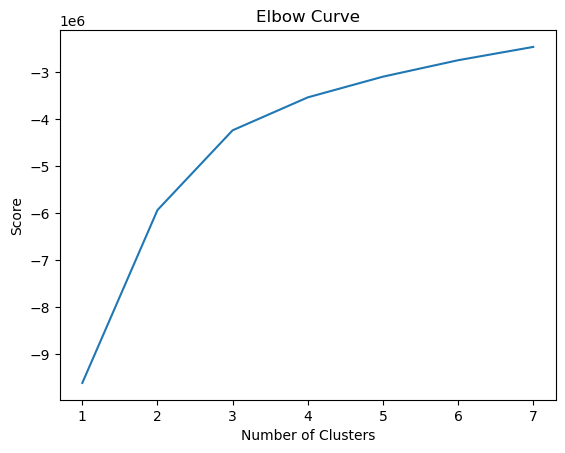

In [23]:
plt.plot(num_cl, score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')

#  4. Number of Clusters

The optimal number of clusters is 4. The slope starts to straighten out at the number 4.

# 5. Running k-means algorithm

In [24]:
kmeans = KMeans(n_clusters = 4)

In [25]:
kmeans.fit(df_citi_bike_kmeans)

C:\Users\Alex Lam\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

# 6. New cluster variable

In [26]:
#New cluster variable
df_citi_bike_kmeans['clusters'] = kmeans.fit_predict(df_citi_bike_kmeans)

C:\Users\Alex Lam\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [27]:
#Checking variable output
df_citi_bike_kmeans.head()

,start_hour,birth_year,trip_duration_min,clusters
0,18,1968.0,16.550000,0
1,18,1983.0,9.683333,2
2,19,1989.0,6.016667,2
3,11,1988.0,9.350000,2
5,22,1986.0,7.116667,2


In [28]:
df_citi_bike_kmeans['clusters'].value_counts()

2    17548
0    12231
3     6948
1     6294
Name: clusters, dtype: int64

# 7. Visuals

Text(0, 0.5, 'Trip Duration')

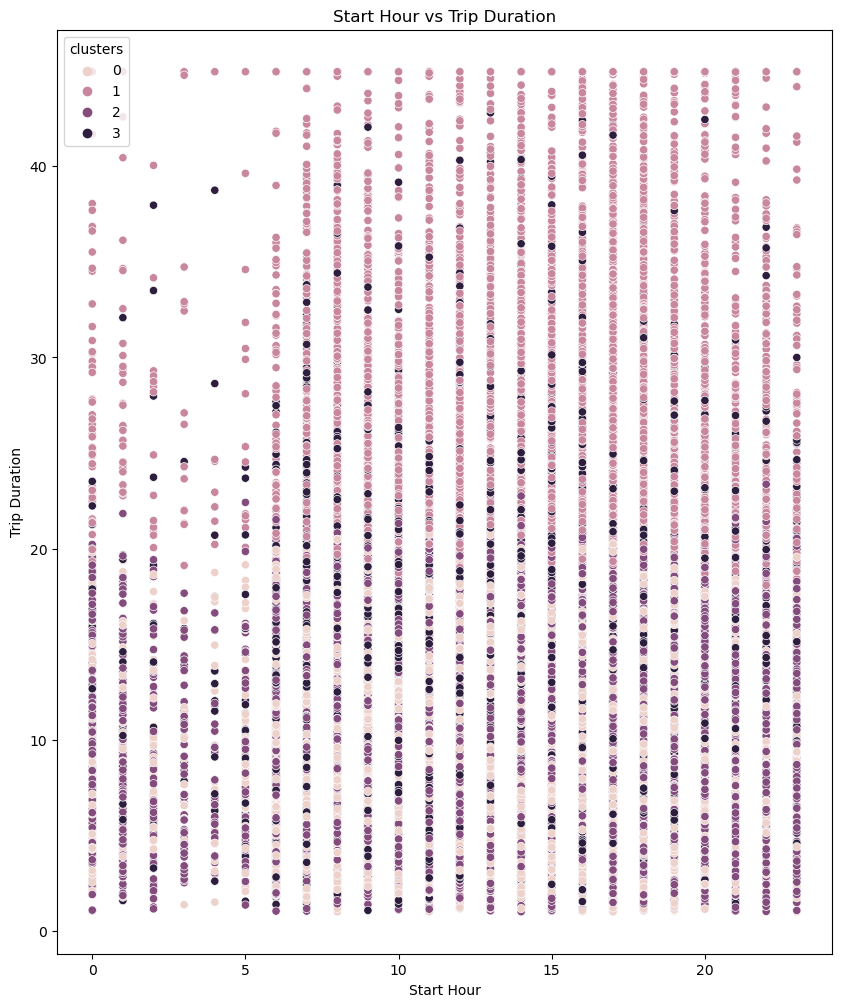

In [43]:
plt.figure(figsize = (10,12))
sns.scatterplot(x = 'start_hour', y = 'trip_duration_min', hue = 'clusters', data = df_citi_bike_kmeans)
plt.title('Start Hour vs Trip Duration')
plt.xlabel('Start Hour')
plt.ylabel('Trip Duration')

Cluster 1 has the longest trip durations no matter what the start hour is. Even when there are less trips during a certain start hour, cluster 1 still has the highest trip durations as seen from start hour 0 to 5.

Text(0, 0.5, 'Trip Duration')

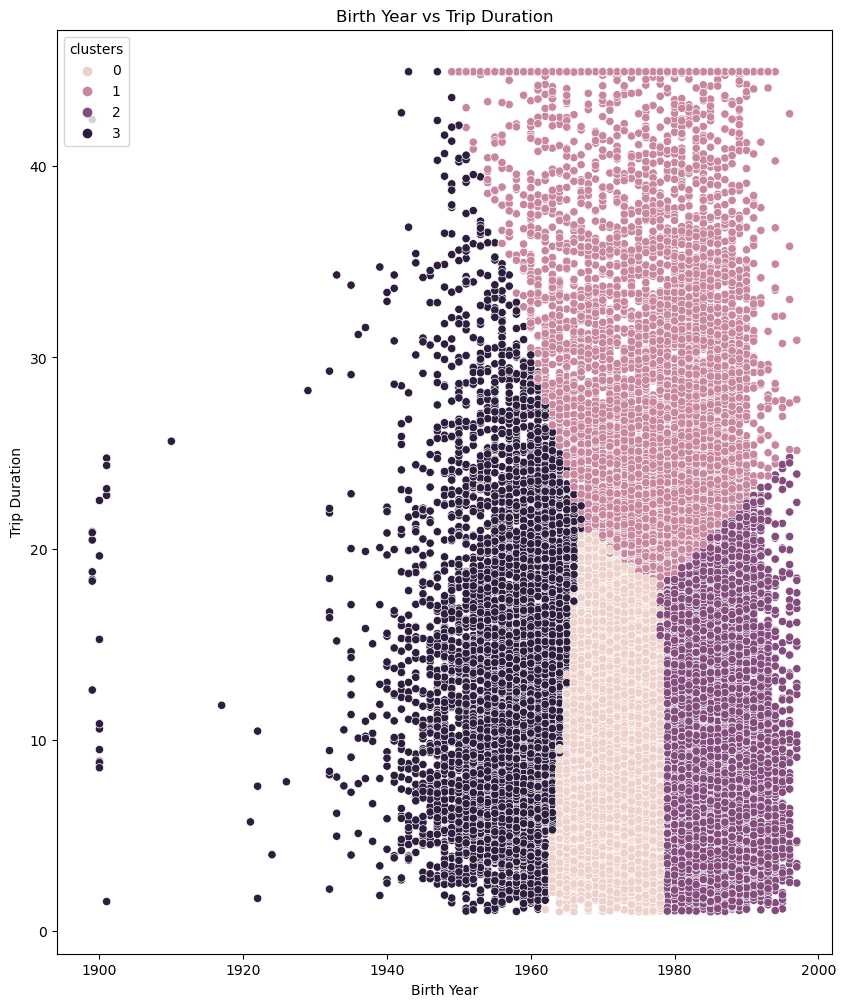

In [44]:
plt.figure(figsize = (10,12))
sns.scatterplot(x = 'birth_year', y = 'trip_duration_min', hue = 'clusters', data = df_citi_bike_kmeans)
plt.title('Birth Year vs Trip Duration')
plt.xlabel('Birth Year')
plt.ylabel('Trip Duration')

Cluster 1 has the most users who have the longest trips. Their birth year ranges from around 1970 to 1990.

# 8. Cluster Discussion

Cluster 1 is unified by their birth year and not their start hour. They generally in their 40s. These clusters generally represent age.

# 9. Descriptive Statistics

In [47]:
df_citi_bike_kmeans.groupby('clusters').agg({'start_hour':['mean', 'median'], 'trip_duration_min':['mean', 'median'], 'birth_year':['mean', 'median']})

start_hour        trip_duration_min              birth_year        
               mean median              mean     median         mean  median
clusters                                                                    
0         13.789796   14.0          9.166019   8.450000  1971.892977  1972.0
1         14.737369   16.0         28.849282  26.933333  1977.603432  1979.0
2         14.299692   15.0          9.674141   8.966667  1984.896284  1985.0
3         13.468768   14.0         12.823978  11.300000  1957.004030  1958.0

# 10. Statistics Analysis

The statistics can be used to decide when to give deals based on any of the variables listed. People starting at certain hours could get discounts. Additionally, people riding passing a certain trip length could be another deal. Students and seniors could get discounts too based on these statistics.